In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coffee_productivity= {
    'person':np.random.choice(['student','employed','unemployed'],100),
    'cups_of_coffee':np.round(np.random.normal(7,1,100),2),
    'productive_hours':np.round(np.random.normal(6,2,100),2),
    'sleep_hours_at_night':np.round(np.random.uniform(9,2,100),2),
    'stress_level':np.round(np.random.uniform(1,10,100),2),
}

df=pd.DataFrame(coffee_productivity)
df.to_csv('coffee_productivity_data.csv',index=False)

In [3]:
df=pd.read_csv('coffee_productivity_data.csv')
print("Original Data Shape:",df.shape)

Original Data Shape: (100, 5)


In [4]:
df.loc[np.random.choice(df.index,10),'cups_of_coffee']=np.nan
df.loc[np.random.choice(df.index,5),'productive_hours']=np.nan

In [5]:
df.to_csv('coffee_productivity_data_miss.csv',index=False)

In [6]:
df=pd.read_csv('coffee_productivity_data_miss.csv')
print("Original Data Shape:",df.shape)
df['cups_of_coffee']=df['cups_of_coffee'].fillna(df['cups_of_coffee'].mean())
df=df.dropna(subset=['productive_hours'])
print("Cleaned Data Shape:",df.shape)
df.to_csv('coffee_productivity_data_clean.csv',index=False)

Original Data Shape: (100, 5)
Cleaned Data Shape: (95, 5)


In [7]:
#Numpy
cups_of_coffee=df['cups_of_coffee'].to_numpy()
productive_hours=df['productive_hours'].to_numpy()
correlation=np.corrcoef(cups_of_coffee,productive_hours)[0,1]
print(f"Correlation between cups of coffee and productive hours:{correlation:.2f}")

Correlation between cups of coffee and productive hours:-0.07


In [8]:
#Scipy
student_productive_hours=df[df['person']=='student']['productive_hours']
employed_productive_hours=df[df['person']=='employed']['productive_hours']
t_stat,p_value=stats.ttest_ind(student_productive_hours,employed_productive_hours)
print(f"T-test between student and employed productive hours:t={t_stat:.2f},p={p_value:3f}")

T-test between student and employed productive hours:t=0.21,p=0.836459


In [9]:
#Statsmodels
X=sm.add_constant(df['productive_hours'])
model=sm.OLS(df['cups_of_coffee'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         cups_of_coffee   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4453
Date:                Mon, 19 May 2025   Prob (F-statistic):              0.506
Time:                        17:56:16   Log-Likelihood:                -131.02
No. Observations:                  95   AIC:                             266.0
Df Residuals:                      93   BIC:                             271.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

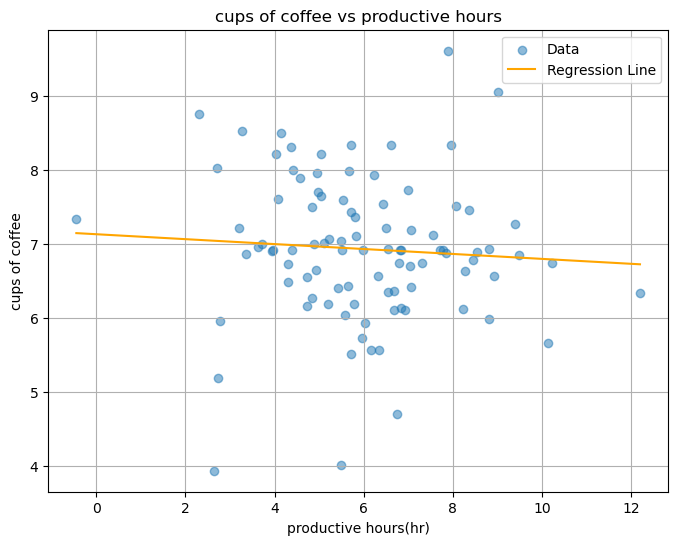

In [10]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['productive_hours'],df['cups_of_coffee'],alpha=0.5,label='Data')
x_range=np.linspace(df['productive_hours'].min(),df['productive_hours'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='orange',label='Regression Line')
plt.title('cups of coffee vs productive hours')
plt.xlabel('productive hours(hr)')
plt.ylabel('cups of coffee')
plt.legend()
plt.grid(True)
plt.show()

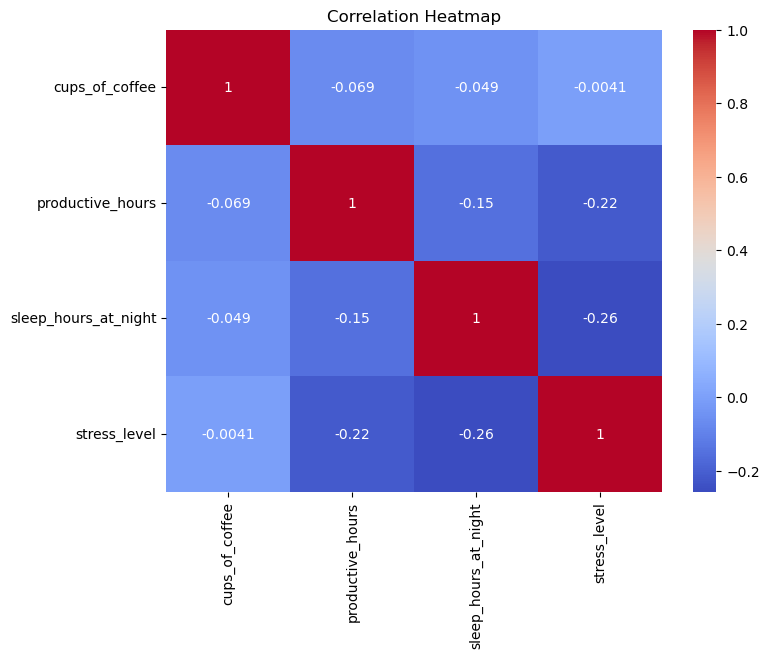

In [11]:
#Statistical visualisation(Boslot?Heatmap) via Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='person',y='stress_level',data=df)
plt.title('Effect of stress level on person')
plt.savefig('stress_level_on_person.png')
plt.close()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [12]:
# Extra NumPy operation
median_sleep = np.median(df['sleep_hours_at_night'])
print("Median Sleep Hours:", median_sleep)

Median Sleep Hours: 5.78


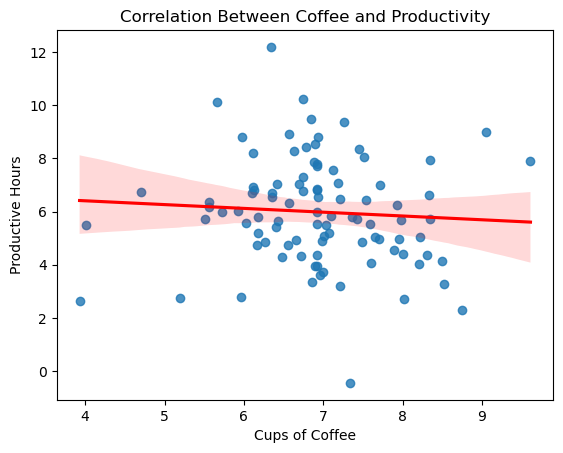

In [14]:
# Correlation plot with regression line
sns.regplot(data=df, x='cups_of_coffee', y='productive_hours', line_kws={'color': 'red'})
plt.title('Correlation Between Coffee and Productivity')
plt.xlabel('Cups of Coffee')
plt.ylabel('Productive Hours')
plt.show()